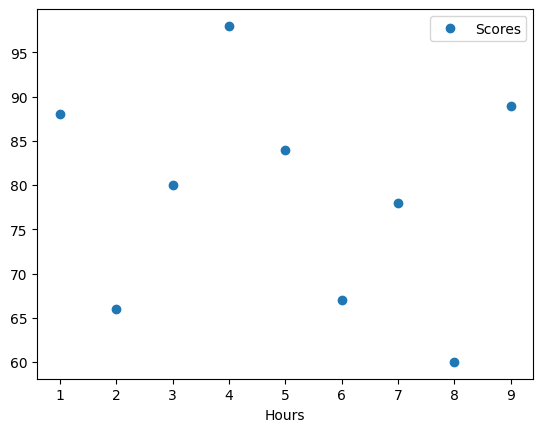

5.0 78.88888888888889
-49.0 60.0 1242.888888888889
2.581988897471611 11.751543108549564


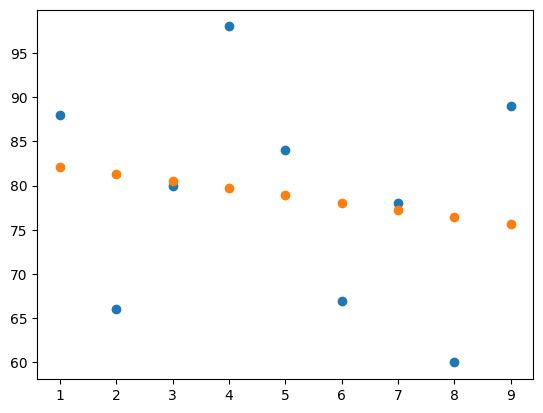

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("C:/Users/Asus/Desktop/students.csv")
df


df.plot(x="Hours", y="Scores", style="o")
plt.show()


x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)


df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df


summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)


correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation


def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5


std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

m = correlation * (std_deviation_y / std_deviation_x)
m


c = df["Scores"].mean() - m * df["Hours"].mean()
c


df["y_prediction"] = m * df["Hours"] + c
df


plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["y_prediction"])
plt.show()



In [5]:
df["error"]=df["y"]-df["y_prediction"]
df

,Scores,Hours,x,y,x*y,x^2,y^2,y_prediction,error
0,66,2,-3.0,-12.888889,38.666667,9.0,166.123457,81.338889,-94.227778
1,78,7,2.0,-0.888889,-1.777778,4.0,0.790123,77.255556,-78.144444
2,89,9,4.0,10.111111,40.444444,16.0,102.234568,75.622222,-65.511111
3,80,3,-2.0,1.111111,-2.222222,4.0,1.234568,80.522222,-79.411111
4,60,8,3.0,-18.888889,-56.666667,9.0,356.790123,76.438889,-95.327778
5,67,6,1.0,-11.888889,-11.888889,1.0,141.345679,78.072222,-89.961111
6,88,1,-4.0,9.111111,-36.444444,16.0,83.012346,82.155556,-73.044444
7,84,5,0.0,5.111111,0.000000,0.0,26.123457,78.888889,-73.777778
8,98,4,-1.0,19.111111,-19.111111,1.0,365.234568,79.705556,-60.594444


In [7]:
df["SSE"]=df["error"]*df["error"]
df

,Scores,Hours,x,y,x*y,x^2,y^2,y_prediction,error,SSE
0,66,2,-3.0,-12.888889,38.666667,9.0,166.123457,81.338889,-94.227778,8878.874105
1,78,7,2.0,-0.888889,-1.777778,4.0,0.790123,77.255556,-78.144444,6106.554198
2,89,9,4.0,10.111111,40.444444,16.0,102.234568,75.622222,-65.511111,4291.705679
3,80,3,-2.0,1.111111,-2.222222,4.0,1.234568,80.522222,-79.411111,6306.124568
4,60,8,3.0,-18.888889,-56.666667,9.0,356.790123,76.438889,-95.327778,9087.385216
5,67,6,1.0,-11.888889,-11.888889,1.0,141.345679,78.072222,-89.961111,8093.001512
6,88,1,-4.0,9.111111,-36.444444,16.0,83.012346,82.155556,-73.044444,5335.490864
7,84,5,0.0,5.111111,0.000000,0.0,26.123457,78.888889,-73.777778,5443.160494
8,98,4,-1.0,19.111111,-19.111111,1.0,365.234568,79.705556,-60.594444,3671.686698


In [8]:
df["y_-ymean"]=df["y"]-y_mean
df

,Scores,Hours,x,y,x*y,x^2,y^2,y_prediction,error,SSE,y_-ymean
0,66,2,-3.0,-12.888889,38.666667,9.0,166.123457,81.338889,-94.227778,8878.874105,-91.777778
1,78,7,2.0,-0.888889,-1.777778,4.0,0.790123,77.255556,-78.144444,6106.554198,-79.777778
2,89,9,4.0,10.111111,40.444444,16.0,102.234568,75.622222,-65.511111,4291.705679,-68.777778
3,80,3,-2.0,1.111111,-2.222222,4.0,1.234568,80.522222,-79.411111,6306.124568,-77.777778
4,60,8,3.0,-18.888889,-56.666667,9.0,356.790123,76.438889,-95.327778,9087.385216,-97.777778
5,67,6,1.0,-11.888889,-11.888889,1.0,141.345679,78.072222,-89.961111,8093.001512,-90.777778
6,88,1,-4.0,9.111111,-36.444444,16.0,83.012346,82.155556,-73.044444,5335.490864,-69.777778
7,84,5,0.0,5.111111,0.000000,0.0,26.123457,78.888889,-73.777778,5443.160494,-73.777778
8,98,4,-1.0,19.111111,-19.111111,1.0,365.234568,79.705556,-60.594444,3671.686698,-59.777778


In [9]:
df["SST"]=df["y_-ymean"]*df["y_-ymean"]
df

,Scores,Hours,x,y,x*y,x^2,y^2,y_prediction,error,SSE,y_-ymean,SST
0,66,2,-3.0,-12.888889,38.666667,9.0,166.123457,81.338889,-94.227778,8878.874105,-91.777778,8423.160494
1,78,7,2.0,-0.888889,-1.777778,4.0,0.790123,77.255556,-78.144444,6106.554198,-79.777778,6364.493827
2,89,9,4.0,10.111111,40.444444,16.0,102.234568,75.622222,-65.511111,4291.705679,-68.777778,4730.382716
3,80,3,-2.0,1.111111,-2.222222,4.0,1.234568,80.522222,-79.411111,6306.124568,-77.777778,6049.382716
4,60,8,3.0,-18.888889,-56.666667,9.0,356.790123,76.438889,-95.327778,9087.385216,-97.777778,9560.493827
5,67,6,1.0,-11.888889,-11.888889,1.0,141.345679,78.072222,-89.961111,8093.001512,-90.777778,8240.604938
6,88,1,-4.0,9.111111,-36.444444,16.0,83.012346,82.155556,-73.044444,5335.490864,-69.777778,4868.938272
7,84,5,0.0,5.111111,0.000000,0.0,26.123457,78.888889,-73.777778,5443.160494,-73.777778,5443.160494
8,98,4,-1.0,19.111111,-19.111111,1.0,365.234568,79.705556,-60.594444,3671.686698,-59.777778,3573.382716


In [16]:
df["yprediction"]=df["y_prediction"].mean()
df

,Scores,Hours,x,y,x*y,x^2,y^2,y_prediction,error,SSE,y_-ymean,SST,yprediction,yprediction^2
0,66,2,-3.0,-12.888889,38.666667,9.0,166.123457,81.338889,-94.227778,8878.874105,-91.777778,8423.160494,78.888889,6616.014846
1,78,7,2.0,-0.888889,-1.777778,4.0,0.790123,77.255556,-78.144444,6106.554198,-79.777778,6364.493827,78.888889,5968.420864
2,89,9,4.0,10.111111,40.444444,16.0,102.234568,75.622222,-65.511111,4291.705679,-68.777778,4730.382716,78.888889,5718.720494
3,80,3,-2.0,1.111111,-2.222222,4.0,1.234568,80.522222,-79.411111,6306.124568,-77.777778,6049.382716,78.888889,6483.828272
4,60,8,3.0,-18.888889,-56.666667,9.0,356.790123,76.438889,-95.327778,9087.385216,-97.777778,9560.493827,78.888889,5842.903735
5,67,6,1.0,-11.888889,-11.888889,1.0,141.345679,78.072222,-89.961111,8093.001512,-90.777778,8240.604938,78.888889,6095.271883
6,88,1,-4.0,9.111111,-36.444444,16.0,83.012346,82.155556,-73.044444,5335.490864,-69.777778,4868.938272,78.888889,6749.535309
7,84,5,0.0,5.111111,0.000000,0.0,26.123457,78.888889,-73.777778,5443.160494,-73.777778,5443.160494,78.888889,6223.456790
8,98,4,-1.0,19.111111,-19.111111,1.0,365.234568,79.705556,-60.594444,3671.686698,-59.777778,3573.382716,78.888889,6352.975586


In [14]:
df["yprediction^2"]=df["y_prediction"]*df["y_prediction"]
df

,Scores,Hours,x,y,x*y,x^2,y^2,y_prediction,error,SSE,y_-ymean,SST,yprediction,yprediction^2
0,66,2,-3.0,-12.888889,38.666667,9.0,166.123457,81.338889,-94.227778,8878.874105,-91.777778,8423.160494,78.888889,6616.014846
1,78,7,2.0,-0.888889,-1.777778,4.0,0.790123,77.255556,-78.144444,6106.554198,-79.777778,6364.493827,78.888889,5968.420864
2,89,9,4.0,10.111111,40.444444,16.0,102.234568,75.622222,-65.511111,4291.705679,-68.777778,4730.382716,78.888889,5718.720494
3,80,3,-2.0,1.111111,-2.222222,4.0,1.234568,80.522222,-79.411111,6306.124568,-77.777778,6049.382716,78.888889,6483.828272
4,60,8,3.0,-18.888889,-56.666667,9.0,356.790123,76.438889,-95.327778,9087.385216,-97.777778,9560.493827,78.888889,5842.903735
5,67,6,1.0,-11.888889,-11.888889,1.0,141.345679,78.072222,-89.961111,8093.001512,-90.777778,8240.604938,78.888889,6095.271883
6,88,1,-4.0,9.111111,-36.444444,16.0,83.012346,82.155556,-73.044444,5335.490864,-69.777778,4868.938272,78.888889,6749.535309
7,84,5,0.0,5.111111,0.000000,0.0,26.123457,78.888889,-73.777778,5443.160494,-73.777778,5443.160494,78.888889,6223.456790
8,98,4,-1.0,19.111111,-19.111111,1.0,365.234568,79.705556,-60.594444,3671.686698,-59.777778,3573.382716,78.888889,6352.975586


In [18]:
df["yprediction-yprediction^2"]=df["y_prediction"]-df["yprediction^2"]
df

,Scores,Hours,x,y,x*y,x^2,y^2,y_prediction,error,SSE,y_-ymean,SST,yprediction,yprediction^2,yprediction-yprediction^2
0,66,2,-3.0,-12.888889,38.666667,9.0,166.123457,81.338889,-94.227778,8878.874105,-91.777778,8423.160494,78.888889,6616.014846,-6534.675957
1,78,7,2.0,-0.888889,-1.777778,4.0,0.790123,77.255556,-78.144444,6106.554198,-79.777778,6364.493827,78.888889,5968.420864,-5891.165309
2,89,9,4.0,10.111111,40.444444,16.0,102.234568,75.622222,-65.511111,4291.705679,-68.777778,4730.382716,78.888889,5718.720494,-5643.098272
3,80,3,-2.0,1.111111,-2.222222,4.0,1.234568,80.522222,-79.411111,6306.124568,-77.777778,6049.382716,78.888889,6483.828272,-6403.306049
4,60,8,3.0,-18.888889,-56.666667,9.0,356.790123,76.438889,-95.327778,9087.385216,-97.777778,9560.493827,78.888889,5842.903735,-5766.464846
5,67,6,1.0,-11.888889,-11.888889,1.0,141.345679,78.072222,-89.961111,8093.001512,-90.777778,8240.604938,78.888889,6095.271883,-6017.199660
6,88,1,-4.0,9.111111,-36.444444,16.0,83.012346,82.155556,-73.044444,5335.490864,-69.777778,4868.938272,78.888889,6749.535309,-6667.379753
7,84,5,0.0,5.111111,0.000000,0.0,26.123457,78.888889,-73.777778,5443.160494,-73.777778,5443.160494,78.888889,6223.456790,-6144.567901
8,98,4,-1.0,19.111111,-19.111111,1.0,365.234568,79.705556,-60.594444,3671.686698,-59.777778,3573.382716,78.888889,6352.975586,-6273.270031


In [19]:
df["SSR"]=df["yprediction-yprediction^2"]*df["yprediction-yprediction^2"]
df

,Scores,Hours,x,y,x*y,x^2,y^2,y_prediction,error,SSE,y_-ymean,SST,yprediction,yprediction^2,yprediction-yprediction^2,SSR
0,66,2,-3.0,-12.888889,38.666667,9.0,166.123457,81.338889,-94.227778,8878.874105,-91.777778,8423.160494,78.888889,6616.014846,-6534.675957,4.270199e+07
1,78,7,2.0,-0.888889,-1.777778,4.0,0.790123,77.255556,-78.144444,6106.554198,-79.777778,6364.493827,78.888889,5968.420864,-5891.165309,3.470583e+07
2,89,9,4.0,10.111111,40.444444,16.0,102.234568,75.622222,-65.511111,4291.705679,-68.777778,4730.382716,78.888889,5718.720494,-5643.098272,3.184456e+07
3,80,3,-2.0,1.111111,-2.222222,4.0,1.234568,80.522222,-79.411111,6306.124568,-77.777778,6049.382716,78.888889,6483.828272,-6403.306049,4.100233e+07
4,60,8,3.0,-18.888889,-56.666667,9.0,356.790123,76.438889,-95.327778,9087.385216,-97.777778,9560.493827,78.888889,5842.903735,-5766.464846,3.325212e+07
5,67,6,1.0,-11.888889,-11.888889,1.0,141.345679,78.072222,-89.961111,8093.001512,-90.777778,8240.604938,78.888889,6095.271883,-6017.199660,3.620669e+07
6,88,1,-4.0,9.111111,-36.444444,16.0,83.012346,82.155556,-73.044444,5335.490864,-69.777778,4868.938272,78.888889,6749.535309,-6667.379753,4.445395e+07
7,84,5,0.0,5.111111,0.000000,0.0,26.123457,78.888889,-73.777778,5443.160494,-73.777778,5443.160494,78.888889,6223.456790,-6144.567901,3.775571e+07
8,98,4,-1.0,19.111111,-19.111111,1.0,365.234568,79.705556,-60.594444,3671.686698,-59.777778,3573.382716,78.888889,6352.975586,-6273.270031,3.935392e+07


In [20]:
df["R^2"]=df["SSR"]/df["SST"]
df

,Scores,Hours,x,y,x*y,x^2,y^2,y_prediction,error,SSE,y_-ymean,SST,yprediction,yprediction^2,yprediction-yprediction^2,SSR,R^2
0,66,2,-3.0,-12.888889,38.666667,9.0,166.123457,81.338889,-94.227778,8878.874105,-91.777778,8423.160494,78.888889,6616.014846,-6534.675957,4.270199e+07,5069.592333
1,78,7,2.0,-0.888889,-1.777778,4.0,0.790123,77.255556,-78.144444,6106.554198,-79.777778,6364.493827,78.888889,5968.420864,-5891.165309,3.470583e+07,5453.038315
2,89,9,4.0,10.111111,40.444444,16.0,102.234568,75.622222,-65.511111,4291.705679,-68.777778,4730.382716,78.888889,5718.720494,-5643.098272,3.184456e+07,6731.920019
3,80,3,-2.0,1.111111,-2.222222,4.0,1.234568,80.522222,-79.411111,6306.124568,-77.777778,6049.382716,78.888889,6483.828272,-6403.306049,4.100233e+07,6777.935913
4,60,8,3.0,-18.888889,-56.666667,9.0,356.790123,76.438889,-95.327778,9087.385216,-97.777778,9560.493827,78.888889,5842.903735,-5766.464846,3.325212e+07,3478.075235
5,67,6,1.0,-11.888889,-11.888889,1.0,141.345679,78.072222,-89.961111,8093.001512,-90.777778,8240.604938,78.888889,6095.271883,-6017.199660,3.620669e+07,4393.693427
6,88,1,-4.0,9.111111,-36.444444,16.0,83.012346,82.155556,-73.044444,5335.490864,-69.777778,4868.938272,78.888889,6749.535309,-6667.379753,4.445395e+07,9130.112212
7,84,5,0.0,5.111111,0.000000,0.0,26.123457,78.888889,-73.777778,5443.160494,-73.777778,5443.160494,78.888889,6223.456790,-6144.567901,3.775571e+07,6936.358892
8,98,4,-1.0,19.111111,-19.111111,1.0,365.234568,79.705556,-60.594444,3671.686698,-59.777778,3573.382716,78.888889,6352.975586,-6273.270031,3.935392e+07,11013.070809


In [21]:
df["sum of SSR"]=df["SSR"].sum()
df

,Scores,Hours,x,y,x*y,x^2,y^2,y_prediction,error,SSE,y_-ymean,SST,yprediction,yprediction^2,yprediction-yprediction^2,SSR,R^2,sum of SSR
0,66,2,-3.0,-12.888889,38.666667,9.0,166.123457,81.338889,-94.227778,8878.874105,-91.777778,8423.160494,78.888889,6616.014846,-6534.675957,4.270199e+07,5069.592333,3.412771e+08
1,78,7,2.0,-0.888889,-1.777778,4.0,0.790123,77.255556,-78.144444,6106.554198,-79.777778,6364.493827,78.888889,5968.420864,-5891.165309,3.470583e+07,5453.038315,3.412771e+08
2,89,9,4.0,10.111111,40.444444,16.0,102.234568,75.622222,-65.511111,4291.705679,-68.777778,4730.382716,78.888889,5718.720494,-5643.098272,3.184456e+07,6731.920019,3.412771e+08
3,80,3,-2.0,1.111111,-2.222222,4.0,1.234568,80.522222,-79.411111,6306.124568,-77.777778,6049.382716,78.888889,6483.828272,-6403.306049,4.100233e+07,6777.935913,3.412771e+08
4,60,8,3.0,-18.888889,-56.666667,9.0,356.790123,76.438889,-95.327778,9087.385216,-97.777778,9560.493827,78.888889,5842.903735,-5766.464846,3.325212e+07,3478.075235,3.412771e+08
5,67,6,1.0,-11.888889,-11.888889,1.0,141.345679,78.072222,-89.961111,8093.001512,-90.777778,8240.604938,78.888889,6095.271883,-6017.199660,3.620669e+07,4393.693427,3.412771e+08
6,88,1,-4.0,9.111111,-36.444444,16.0,83.012346,82.155556,-73.044444,5335.490864,-69.777778,4868.938272,78.888889,6749.535309,-6667.379753,4.445395e+07,9130.112212,3.412771e+08
7,84,5,0.0,5.111111,0.000000,0.0,26.123457,78.888889,-73.777778,5443.160494,-73.777778,5443.160494,78.888889,6223.456790,-6144.567901,3.775571e+07,6936.358892,3.412771e+08
8,98,4,-1.0,19.111111,-19.111111,1.0,365.234568,79.705556,-60.594444,3671.686698,-59.777778,3573.382716,78.888889,6352.975586,-6273.270031,3.935392e+07,11013.070809,3.412771e+08
